# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [7]:
#Verificação de tipo de dado de cada coluna
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [9]:
#Verificação de valores nulos por coluna
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [11]:
#Excluindo coluna 'Genero' Motivo: Pelo fato de representar muito pouco dentro da base de dados, e não ter a importância necessária para o que estamos
#tentando descobrir com esse tratamento de dados
df.dropna(subset=['Genero'], inplace=True)

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [13]:
# Justificativa: Fazendo uma análise através do comando, consegui constatar que o 'yes' é o que mais aparece na tabela, o que também constatei
# olhando a tabela no excel, então decidi por usar o 'yes' já que tinha muito linhas preenchidas com essa opção, partindo da ideia de que a maioria dos
# campos que estão vazios, também estariam preenchidos com 'yes'.

# Substituindo os dados faltantes da coluna 'PhoneService' 
df['PhoneService'].mode()
df['PhoneService'] = df['PhoneService'].mode()[0]

In [15]:
# Substituindo os dados faltantes da coluna 'Pagamento_Mensal'
df['Pagamento_Mensal'].mean()

65.60756321839081

In [17]:
df['Pagamento_Mensal'].median()

71.45

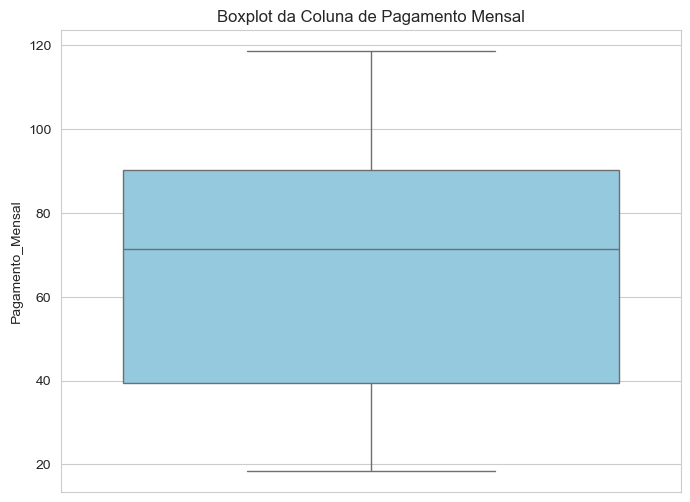

In [19]:
# Gráfico de Boxplot para verificar a presença de Outliers
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [21]:
# Verifica valores únicos em colunas 
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique() for col in categorical_columns}

# Exibi valores únicos
for col, values in unique_values.items():
    print(f"Coluna: {col}")
    print(f"Valores únicos: {values}")
    print('-' * 50)


Coluna: customerID
Valores únicos: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']
--------------------------------------------------
Coluna: Genero
Valores únicos: ['Female' 'Male' 'F' 'M' 'f']
--------------------------------------------------
Coluna: Casado
Valores únicos: ['Yes' 'No']
--------------------------------------------------
Coluna: Dependents
Valores únicos: ['No' 'Yes']
--------------------------------------------------
Coluna: PhoneService
Valores únicos: ['Yes']
--------------------------------------------------
Coluna: Servico_Internet
Valores únicos: ['DSL' 'No' 'Fiber optic' 'dsl']
--------------------------------------------------
Coluna: Servico_Seguranca
Valores únicos: ['No' 'Yes' 'No internet service']
--------------------------------------------------
Coluna: Suporte_Tecnico
Valores únicos: ['No' 'Yes' 'No internet service']
--------------------------------------------------
Coluna: StreamingTV
Valores únicos: ['No' 'No in

In [23]:
# Verifica inconsistências 
inconsistent_values = {}
for col in categorical_columns:
    lower_values = df[col].dropna().str.lower().unique()  # Valores normalizados
    if len(lower_values) != len(df[col].dropna().unique()):  # Se forem diferentes
        inconsistent_values[col] = df[col].unique()

# Exibir inconsistências
for col, values in inconsistent_values.items():
    print(f"Coluna com inconsistências: {col}")
    print(f"Valores encontrados: {values}")
    print('-' * 50)


Coluna com inconsistências: Genero
Valores encontrados: ['Female' 'Male' 'F' 'M' 'f']
--------------------------------------------------
Coluna com inconsistências: Servico_Internet
Valores encontrados: ['DSL' 'No' 'Fiber optic' 'dsl']
--------------------------------------------------


In [27]:
# Identifica valores iguais, escritos de formas diferente
def check_duplicates(df, column):
    normalized = df[column].dropna().str.lower().str.strip()  # Normaliza valores
    return df[column][~df[column].str.lower().str.strip().isin(normalized.unique())]

# Analisa duplicações por coluna
for col in categorical_columns:
    duplicates = check_duplicates(df, col)
    if not duplicates.empty:
        print(f"Coluna: {col}")
        print(f"Duplicaçōes semânticas encontradas: {duplicates.unique()}")
        print('-' * 50)


In [29]:
# Correção de inconsistências nas colunas categóricas
df['Genero'] = df['Genero'].str.strip().str.capitalize().replace({'F': 'Female', 'M': 'Male', 'f': 'Female'})
df['Servico_Internet'] = df['Servico_Internet'].str.strip().str.capitalize()

# Aplica a uniformização de capitalização a todas as colunas categóricas
for col in categorical_columns:
    df[col] = df[col].astype(str).str.strip().str.capitalize()

# Exibir os valores únicos corrigidos para validação
corrected_values = {col: df[col].unique() for col in categorical_columns}
corrected_values


{'customerID': array(['7590-vhveg', '5575-gnvde', '3668-qpybk', ..., '5702-skuob',
        '1134-ywtyf', '6061-gwwav'], dtype=object),
 'Genero': array(['Female', 'Male'], dtype=object),
 'Casado': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['Yes'], dtype=object),
 'Servico_Internet': array(['Dsl', 'No', 'Fiber optic'], dtype=object),
 'Servico_Seguranca': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Suporte_Tecnico': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingTV': array(['No', 'No internet service', 'Yes'], dtype=object),
 'Tipo_Contrato': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
        'Credit card (automatic)'], dtype=object),
 'Churn': array(['No', 'Yes'], dtype=object)}

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand